<a href="https://colab.research.google.com/github/saipragna25/deep-learning-asgn-neural-networks-/blob/main/DL_NN_with_builtin_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
class MyNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [ ]:
# Define the equation for generating synthetic data
def equation(x1, x2, x3):
    return 2 * x1 ** 2 - 3 * x2 ** 3 + 4 * x3

In [ ]:
# Generate synthetic data
n_samples = 100
x1 = np.random.uniform(-1, 1, size=n_samples)
x2 = np.random.uniform(-1, 1, size=n_samples)
x3 = np.random.uniform(-1, 1, size=n_samples)
y = equation(x1, x2, x3) + 0.1 * np.random.randn(n_samples)

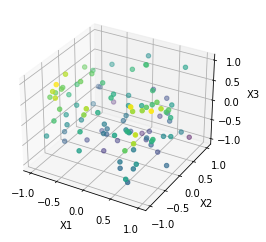

In [ ]:
# Plot the synthetic data using a 4D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

In [ ]:
# Convert the data to PyTorch tensors
x = torch.tensor(np.column_stack((x1, x2, x3)), dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Define the model, loss function and optimizer
model = MyNet(3, 10, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y.unsqueeze(1))
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [0/1000], Loss: 8.9525
Epoch [100/1000], Loss: 0.7971
Epoch [200/1000], Loss: 0.6002
Epoch [300/1000], Loss: 0.5098
Epoch [400/1000], Loss: 0.4566
Epoch [500/1000], Loss: 0.4016
Epoch [600/1000], Loss: 0.3465
Epoch [700/1000], Loss: 0.3104
Epoch [800/1000], Loss: 0.2734
Epoch [900/1000], Loss: 0.2582


In [ ]:
# Test the model
with torch.no_grad():
    x_test = torch.tensor(np.mgrid[-1:1:0.1, -1:1:0.1, -1:1:0.1].reshape(3, -1).T, dtype=torch.float32)
    y_test = equation(x_test[:, 0], x_test[:, 1], x_test[:, 2])
    y_pred = model(x_test)
    loss = criterion(y_pred, y_test.unsqueeze(1))
    print(f'Test Loss: {loss.item():.4f}')

Test Loss: 0.3602


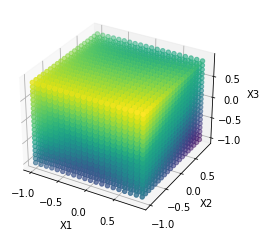

In [ ]:
# Plot the predicted values using a 4D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_pred.squeeze().numpy())
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()
